In [4]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np 
import math
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D

In [5]:
sns.set()

In [39]:
def draw_errors(plot_lo=-3, plot_hi=3, filename='None'):
  fig = plt.figure(figsize=(7, 6))
  for i in [0, 1]:
      target = ([0, 1], [1, 0])[i]
      ax = fig.add_subplot(2, 2, 1+(2*i), projection='3d')
      plot_side = 20
      x_space = np.linspace(plot_lo, plot_hi, plot_side)
      y_space = np.linspace(plot_lo, plot_hi, plot_side)
      x_grid, y_grid = np.meshgrid(x_space, y_space) 
      Z = np.zeros((plot_side, plot_side))
      for px in range(plot_side):
        for py in range(plot_side):
          XY = [x_grid[px,py], y_grid[px,py]]
          Z[px, py] = (XY[0] - target[0]) ** 2 + (XY[1] - target[1]) ** 2
      ax.plot_surface(x_grid, y_grid, Z, rstride=1, cstride=1, cmap='cool', edgecolor='none')
      title = 'error for target = ({:1.1f}, {:1.1f})'.format(target[0], target[1])
      plt.title(title)
      plt.xlabel('P1')
      plt.ylabel('P2')

      plt.subplot(2, 2, i*2 + 2)
      plt.contourf(x_grid, y_grid, Z, 15, cmap='cool') 
      plt.axvline(target[0], color='black', linewidth=.5)
      plt.axhline(target[1], color='black', linewidth=.5)
      plt.xlabel('P1')
      plt.ylabel('P2')
      plt.title(title)
      plt.colorbar()
  plt.tight_layout()
  fig.subplots_adjust(wspace=.35)
  plt.show()
  plt.savefig(filename)
  

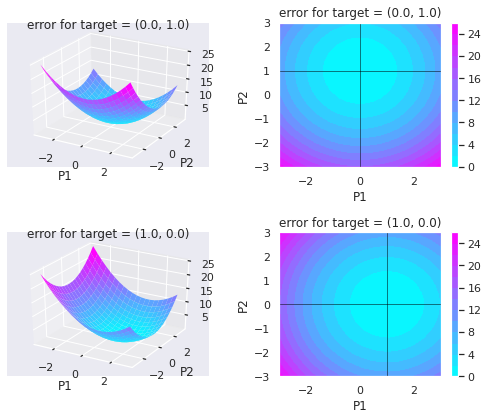

<Figure size 432x288 with 0 Axes>

In [40]:
draw_errors(plot_lo=-3, plot_hi=3, filename='simple-net-errors-range-3-3')

In [133]:
def draw_clipped_errors(plot_lo=-3, plot_hi=3, filename='None'):
  fig = plt.figure(figsize=(6, 5))
  target = [1, 0]
  ax = fig.add_subplot(1, 1, 1, projection='3d')
  plot_side = 20
  x_space = np.linspace(plot_lo, plot_hi, plot_side)
  y_space = np.linspace(plot_lo, plot_hi, plot_side)
  x_grid, y_grid = np.meshgrid(x_space, y_space)
  Z = np.zeros((plot_side, plot_side))
  for px in range(plot_side):
    for py in range(plot_side):
      XY = [x_grid[px, py], y_grid[px, py]]
      Z[px, py] = (XY[0] - target[0]) ** 2 + (XY[1] - target[1]) ** 2
  for px in range(0, int(plot_side/2)):
    for py in range(plot_side):
      Z[px, py] = 0
  ax.plot_surface(x_grid, y_grid, Z, rstride=1, cstride=1, cmap='cool', edgecolors='none')
  title = 'error for target = ({:1.1f}, {:1.1f}) at P2=0'.format(target[0], target[1])
  plt.title(title)
  plt.xlabel('P1')
  plt.ylabel('P2')
  plt.ylim(-3, 3)
  plt.tight_layout()
  fig.subplots_adjust(wspace=.35)
  plt.show()
  plt.savefig(filename)

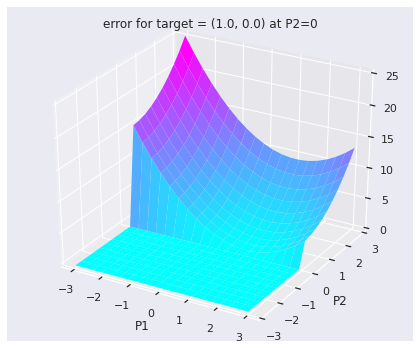

<Figure size 432x288 with 0 Axes>

In [134]:
draw_clipped_errors(filename='error-for-P2-0')

In [143]:
def draw_clipped_errors_pair(plot_lo=-3, plot_hi=3, filename=None):
  fig = plt.figure(figsize=(8, 3))
  target = [1, 0]
  ax = fig.add_subplot(1, 2, 1, projection='3d')
  plot_side = 20
  x_space = np.linspace(plot_lo, plot_hi, plot_side)
  y_space = np.linspace(plot_lo, plot_hi, plot_side)
  x_grid, y_grid = np.meshgrid(x_space, y_space)
  Z = np.zeros((plot_side, plot_side))
  for px in range(plot_side):
    for py in range(plot_side):
      XY = [x_grid[px, py], y_grid[px, py]]
      Z[px, py] = (XY[0] - target[0]) ** 2 + (XY[1] - target[1]) ** 2
  for px in range(0, int(plot_side/2)):
    for py in range(plot_side):
      Z[px, py] = 0
  ax.plot_surface(x_grid, y_grid, Z, rstride=1, cstride=1, cmap='cool', edgecolors='none')
  title = 'error for target = ({:1.1f}, {:1.1f}) at P2=1.5'.format(target[0], target[1])
  plt.title(title)
  plt.xlabel('P1')
  plt.ylabel('P2')
  plt.ylim(-3, 3)

  ax = fig.add_subplot(1, 2, 2, projection='3d')
  plot_side = 20
  x_space = np.linspace(plot_lo, plot_hi, plot_side)
  y_space = np.linspace(plot_lo, plot_hi, plot_side)
  x_grid, y_grid = np.meshgrid(x_space, y_space)
  Z = np.zeros((plot_side,plot_side))
  for px in range(plot_side):
      for py in range(plot_side):
          XY = [x_grid[px,py], y_grid[px,py]]
          Z[px, py] = (XY[0]-target[0])**2 + (XY[1]-target[1])**2
  for py in range(0, int(plot_side*5/12)):
      for px in range(plot_side):
          Z[px,py] = 0
  ax.plot_surface(x_grid, y_grid, Z, rstride=1, cstride=1, cmap='cool', edgecolor='none')
  title = 'error for target = ({:1.1f}, {:1.1f}) at P1=-0.5'.format(target[0], target[1])
  plt.title(title)
  plt.xlabel('P1')
  plt.ylabel('P2')
  plt.ylim(-3, 3)

  plt.tight_layout()
  fig.subplots_adjust(wspace=.35)
  fig.subplots_adjust(hspace=.35)
  plt.show()

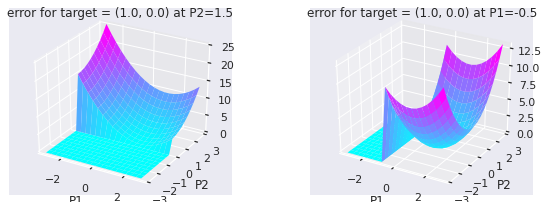

In [144]:
draw_clipped_errors_pair(filename='clipped-error-pair')

In [103]:
def show_P1_error(range_lo=-3, range_hi=3, demo_value=-1, show_deriv=True, filename='error-P1-only-4-4'):
  def err(x):
    return (1-x) ** 2

  plt.figure(figsize=(6, 5))
  xvals = np.linspace(range_lo, range_hi, 100)
  yvals = [err(x) for x in xvals]
  plt.plot(xvals, yvals, linewidth=1, c='#000000', zorder=10)
  if show_deriv:
    deriv_x_left = demo_value - 1
    deriv_x_right = demo_value + 1
    deriv_at_demo = 2 * (demo_value -1)
    deriv_y_left = err(demo_value) - deriv_at_demo
    deriv_y_right = err(demo_value) + deriv_at_demo
    plt.plot([deriv_x_left, deriv_x_right], [deriv_y_left, deriv_y_right], zorder=10, linewidth=3, c='g')
  plt.scatter([-1, demo_value], [0, err(demo_value)], facecolors='orange', edgecolors='orange', zorder=10, linewidth=3)
  plt.plot([-1, demo_value], [0, err(demo_value)], c='orange', zorder=10, linewidth=3)
  plt.xlabel('P1')
  plt.ylabel('error')
  plt.xticks([-3, -2, -1, 0, 1, 2, 3])
  plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16])
  plt.xlim(-3.2, 3.2)
  plt.ylim(-0.2, 16.2)
  title = 'Error when P2=0 for target(1. 0)'
  plt.title(title)
  plt.show()
  plt.savefig(filename)


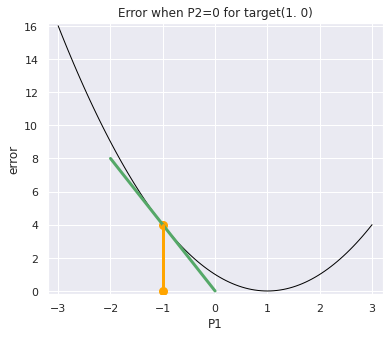

<Figure size 432x288 with 0 Axes>

In [104]:
show_P1_error(range_lo=-3, range_hi=3, demo_value=-1, show_deriv=True, filename='error-P1-only-4-4')

In [158]:
def show_P1_P2_error(plot_limits=[-3,3], pvals=[-.5, 1.5], target=[1,0], show_deriv=True, filename=None):
    def err(x, pval):
        if pval==0:
            return ((target[0]-x)**2) + ((target[1]-pvals[1])**2)
        else:
            return ((target[0]-pvals[0])**2) + ((target[1]-x)**2)

    fig = plt.figure(figsize=(8, 3))
    for i in range(2):
        plt.subplot(1, 2, i+1)
        xvals = np.linspace(plot_limits[0], plot_limits[1], 100)
        yvals = [err(x, i) for x in xvals]
        plt.plot(xvals, yvals, color='black')
        plt.ylim(0, np.max(yvals)+.5)
        demo_value = pvals[i]
        plt.scatter([demo_value], err(demo_value, i), s=150, c='orange', zorder=20)
        plt.scatter([demo_value], [0], s=150, c='orange', zorder=20)
        plt.plot([demo_value, demo_value], [0, err(demo_value, i)], c='orange', lw=3, zorder=5)
        if show_deriv:
            deriv_x_left = demo_value-1
            deriv_x_right = demo_value+1
            deriv_at_demo = 2*(demo_value-target[i])
            deriv_y_left = err(demo_value, i) - deriv_at_demo
            deriv_y_right = err(demo_value, i) + deriv_at_demo
            plt.plot([deriv_x_left, deriv_x_right], [deriv_y_left, deriv_y_right], lw=3, color='green', zorder=30)
        pstring = 'P'+str(i+1)
        plt.xlabel(pstring)
        plt.ylabel('error')
        if i==0:
            title = 'P1 error, P2='+str(pvals[1])+', label='+str(target)
        else:
            title = 'P2 error, P1='+str(pvals[0])+', label='+str(target)
        plt.title(title)
        plt.ylim(-2, 20)
    fig.subplots_adjust(wspace=.35)
    plt.savefig(filename)
    plt.show()

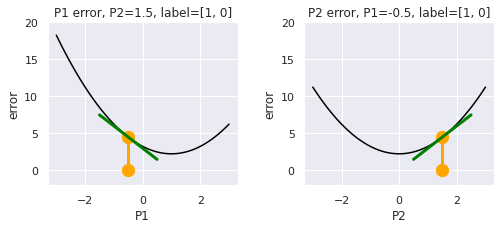

In [159]:
show_P1_P2_error(filename='error-P1-P2')

In [105]:
def sigma(x):
  return 1 / (1 + math.exp(-x))

def sigma_prime(x):
  s = sigma(x)
  return s * (1-s)

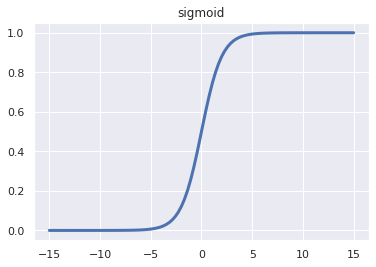

<Figure size 432x288 with 0 Axes>

In [108]:
xrange = 15
xvals = np.linspace(-xrange, xrange, 100)
yvals = [sigma(x) for x in xvals]
plt.plot(xvals, yvals, c='b', linewidth=3)
plt.title('sigmoid')
plt.show()
plt.savefig('sigmoid-function')

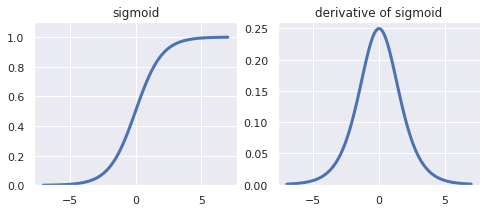

<Figure size 432x288 with 0 Axes>

In [118]:
xrange = 7
fig = plt.figure(figsize=(8, 3))
xvals = np.linspace(-xrange, xrange, 100) 
yvals = [sigma(x) for x in xvals]
yp = [sigma_prime(x) for x in xvals]
plt.subplot(1, 2, 1)
plt.plot(xvals, yvals, c='b', linewidth=3)
plt.title('sigmoid')
plt.ylim(0.0, 1.1)

plt.subplot(1, 2, 2)
plt.plot(xvals, yp, linewidth=3, c='b')
plt.ylim(-0.001, 0.26)
plt.title('derivative of sigmoid')

plt.show()
plt.savefig('sigmoid-with-derivative')

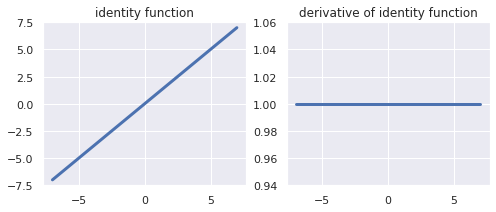

<Figure size 432x288 with 0 Axes>

In [119]:
xrange = 7 
fig = plt.figure(figsize=(8, 3))
xvals = np.linspace(-xrange, xrange, 100)
ys = np.copy(xvals)
yp = np.ones(len(ys))

plt.subplot(1, 2, 1)
plt.plot(xvals, ys, linewidth=3, c='b')
plt.title('identity function')
plt.ylim(-7.5, 7.5)

plt.subplot(1, 2, 2)
plt.plot(xvals, yp, c='b', linewidth=3)
plt.title('derivative of identity function')
plt.ylim(0.94, 1.06)

plt.show()
plt.savefig('identity-with-derivative')

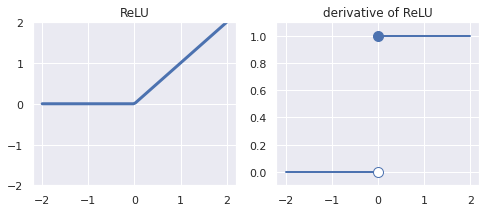

<Figure size 432x288 with 0 Axes>

In [127]:
xrange = 2
fig = plt.figure(figsize=(8, 3))
xvals = np.linspace(-xrange, xrange, 100)
yvals = [x if x > 0 else 0 for x in xvals]
yp = [0 if x < 0 else 1 for x in xvals]

plt.subplot(1, 2, 1)
plt.plot(xvals, yvals, color='b', linewidth=3)
plt.ylim(-xrange, xrange)
plt.title('ReLU')

plt.subplot(1, 2, 2)
plt.plot([-2, 0], [0, 0], lw=2, color='b')
plt.plot([0, 2], [1, 1], lw=2, color='b')
plt.scatter(0, 1, facecolors='b', edgecolors='b', s=100, zorder=10)
plt.scatter(0, 0, facecolors='white', edgecolors='b', s=100, zorder=10)
plt.ylim(-0.1, 1.1)
plt.title('derivative of ReLU')

plt.show()
plt.savefig('ReLU-with-derivative')